In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv('/content/customers.csv')

In [55]:
df.head(15)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [3]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [4]:
df.dtypes

,0
ID,int64
Gender,object
Ever_Married,object
Age,int64
Graduated,object
Profession,object
Work_Experience,float64
Spending_Score,object
Family_Size,float64
Var_1,object


In [5]:
df.shape

(10695, 11)

In [6]:
df.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,190
Age,0
Graduated,102
Profession,162
Work_Experience,1098
Spending_Score,0
Family_Size,448
Var_1,108


In [7]:
df_cleaned=df.dropna(axis=0)

In [8]:
df_cleaned.shape

(8819, 11)

In [9]:
df_cleaned.nunique()

,0
ID,6916
Gender,2
Ever_Married,2
Age,67
Graduated,2
Profession,9
Work_Experience,15
Spending_Score,3
Family_Size,9
Var_1,7


In [10]:
df_cleaned=df_cleaned.drop(columns=['ID','Var_1'],axis=1)

In [11]:
columns_to_encode = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']
ordinal_encoder = OrdinalEncoder()
df_cleaned[columns_to_encode] = ordinal_encoder.fit_transform(df_cleaned[columns_to_encode])
df_cleaned.head()


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1.0,0.0,22,0.0,5.0,1.0,2.0,4.0,D
2,0.0,1.0,67,1.0,2.0,1.0,2.0,1.0,B
3,1.0,1.0,67,1.0,7.0,0.0,1.0,2.0,B
5,1.0,1.0,56,0.0,0.0,0.0,0.0,2.0,C
6,1.0,0.0,32,1.0,5.0,1.0,2.0,3.0,C


In [12]:
df_cleaned.dtypes

,0
Gender,float64
Ever_Married,float64
Age,int64
Graduated,float64
Profession,float64
Work_Experience,float64
Spending_Score,float64
Family_Size,float64
Segmentation,object


In [13]:
le = LabelEncoder()
df_cleaned['Segmentation'] = le.fit_transform(df_cleaned['Segmentation'])

In [14]:
df_cleaned.dtypes

,0
Gender,float64
Ever_Married,float64
Age,int64
Graduated,float64
Profession,float64
Work_Experience,float64
Spending_Score,float64
Family_Size,float64
Segmentation,int64


<Axes: >

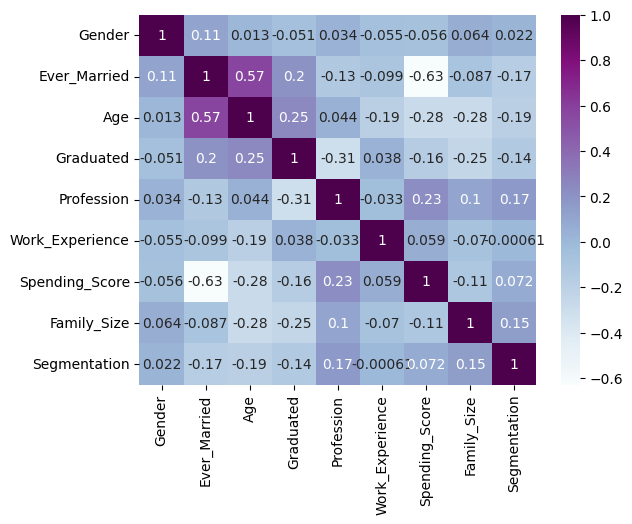

In [15]:
corr = df_cleaned.corr()

sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,cmap="BuPu",annot= True)

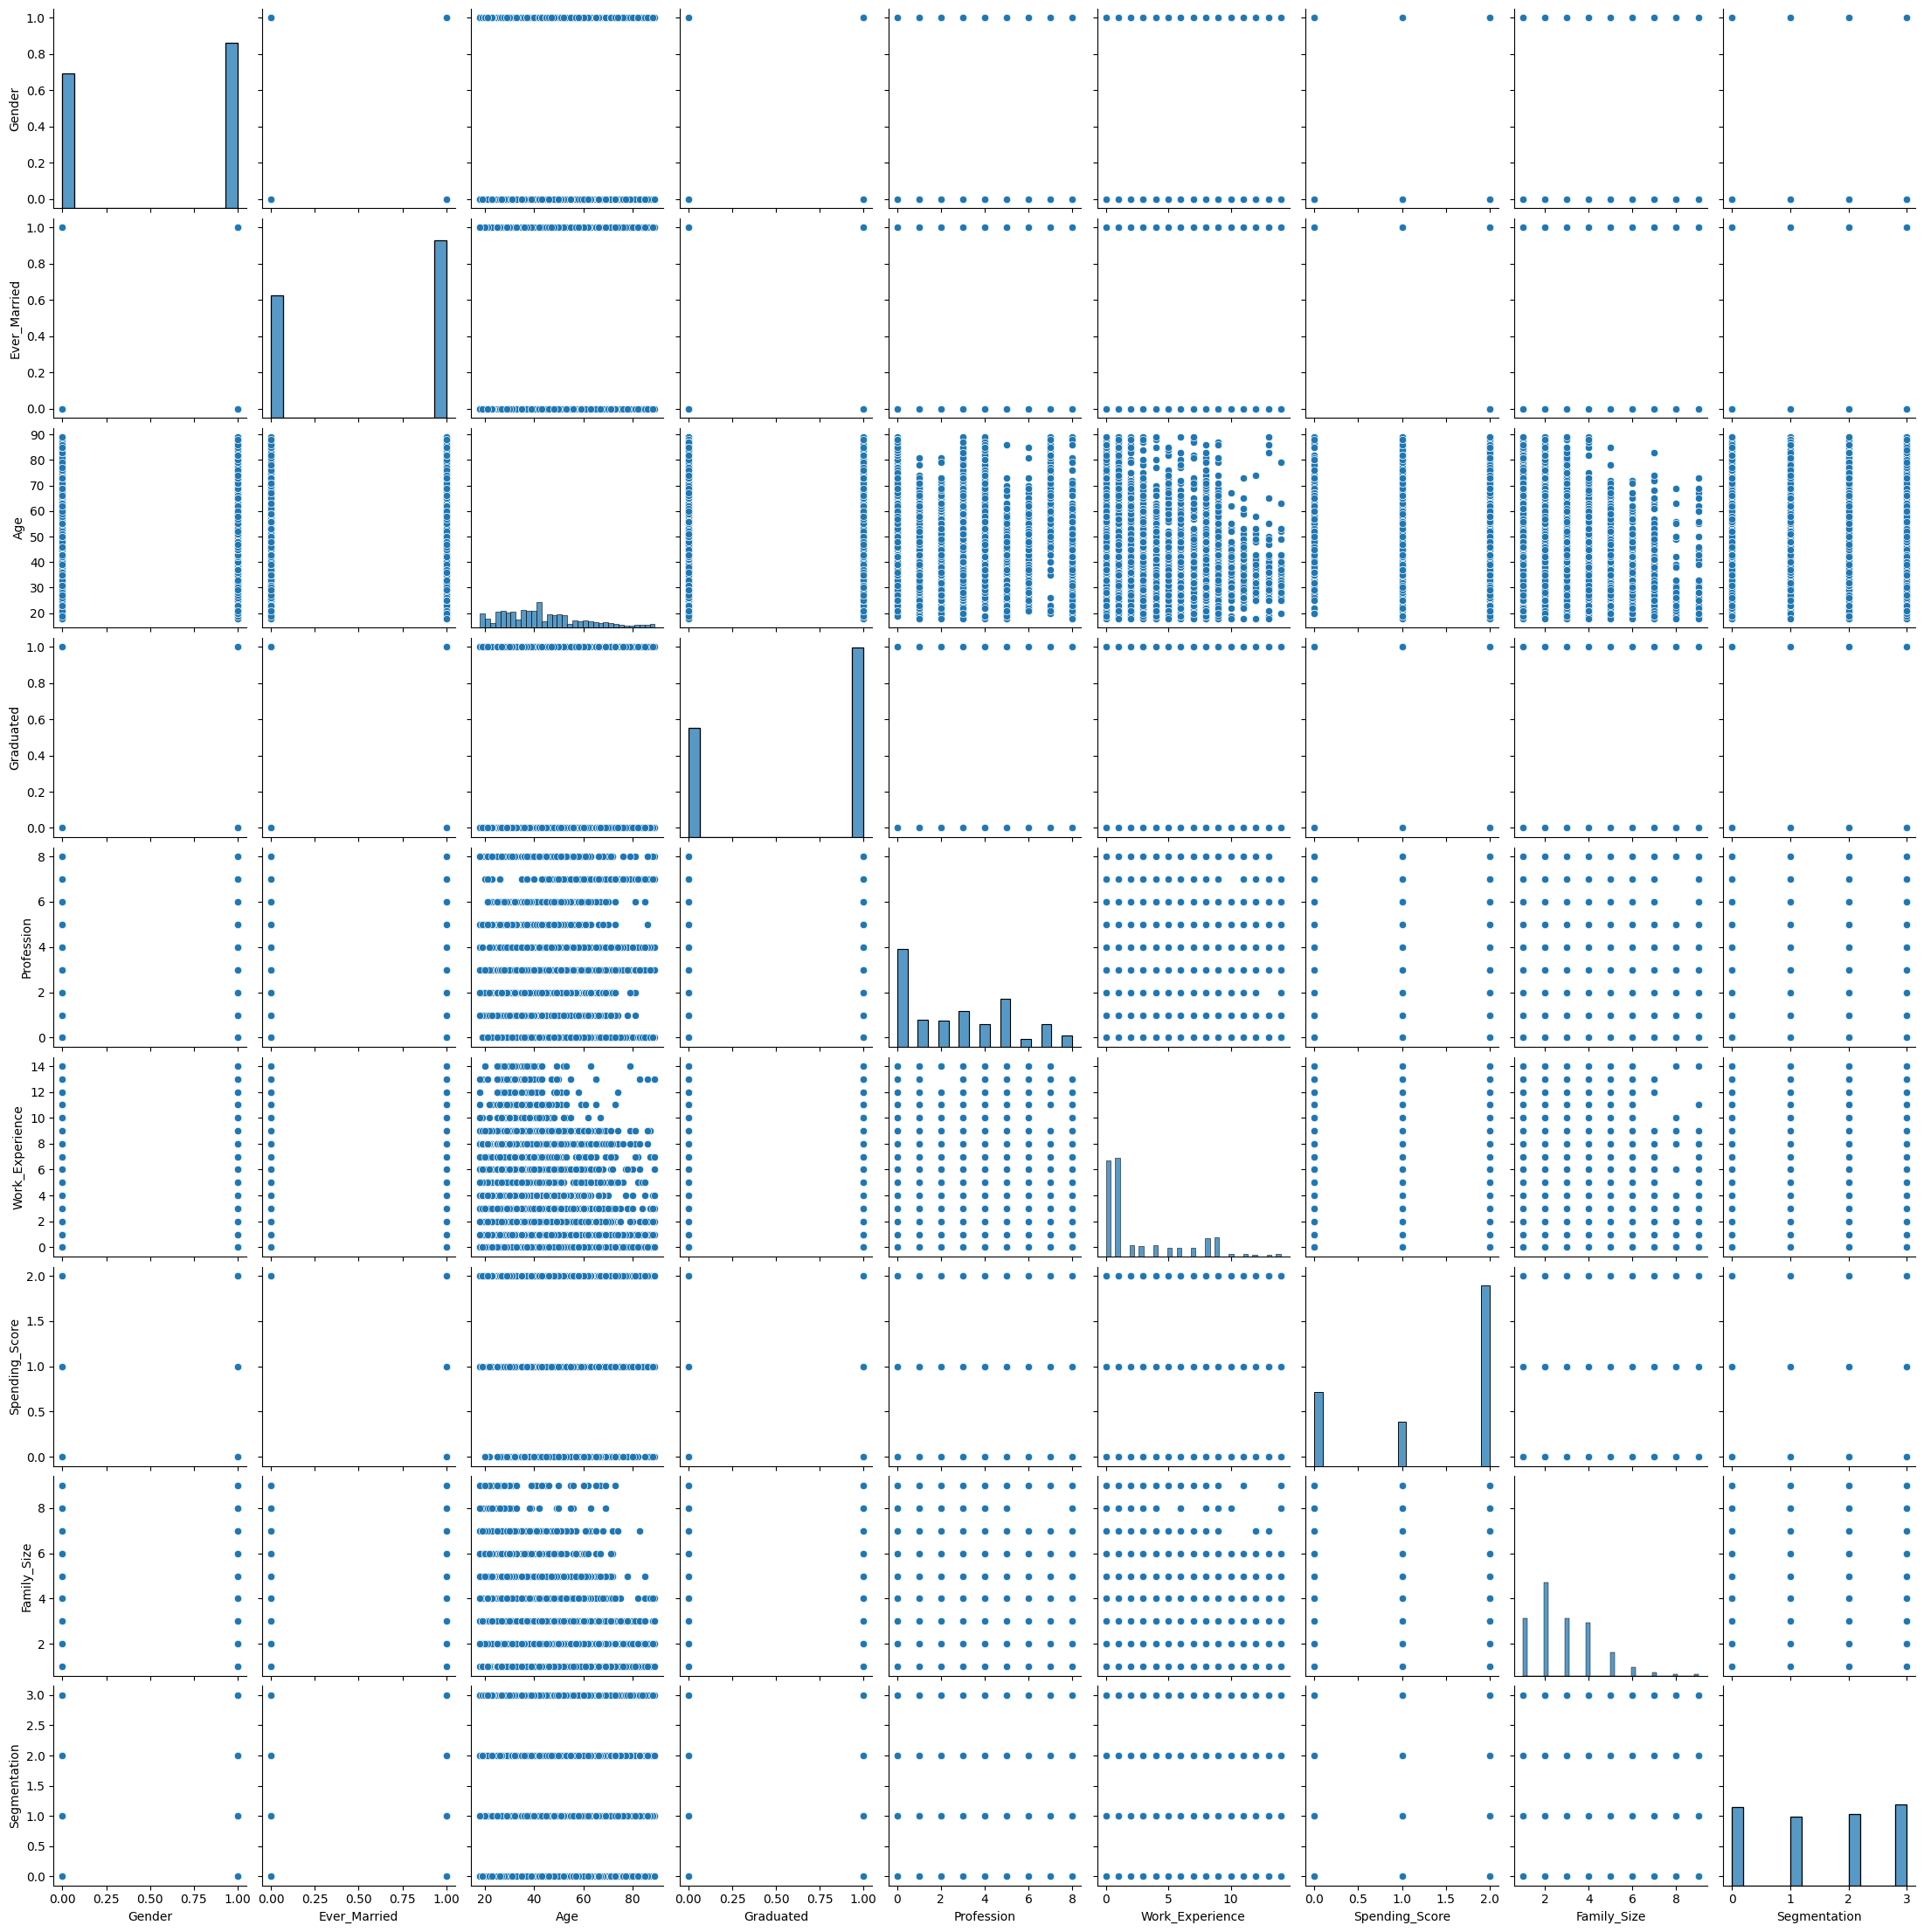

In [16]:
sns.pairplot(df_cleaned)

<ipython-input-17-9be9bbca1344>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Age'])


<Axes: xlabel='Age', ylabel='Density'>

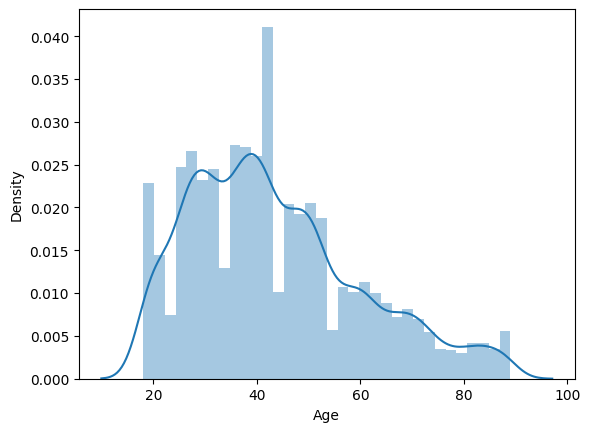

In [17]:
sns.distplot(df_cleaned['Age'])

<Axes: xlabel='Family_Size', ylabel='Age'>

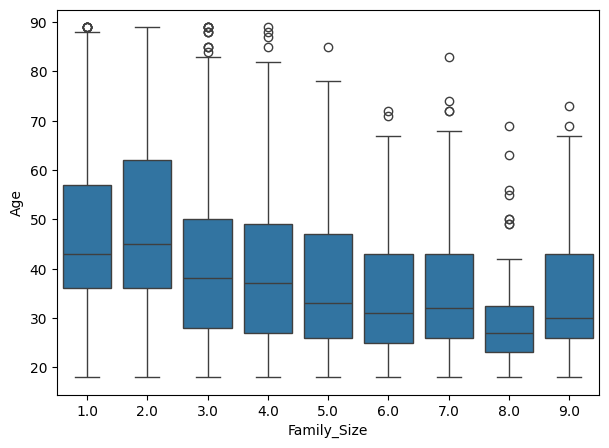

In [18]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Family_Size',y='Age',data=df_cleaned)

<Axes: xlabel='Family_Size', ylabel='Spending_Score'>

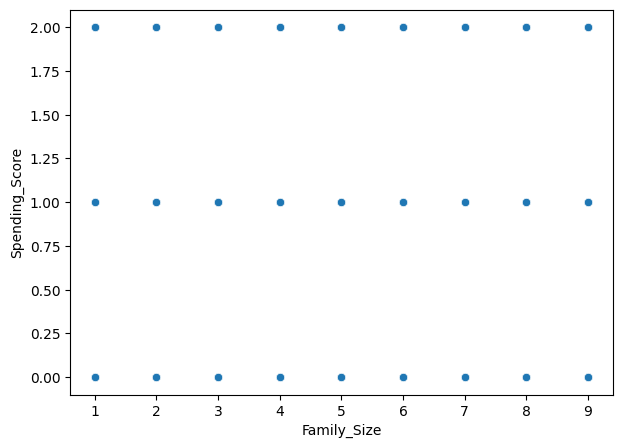

In [19]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Family_Size',y='Spending_Score',data=df_cleaned)

<Axes: xlabel='Family_Size', ylabel='Age'>

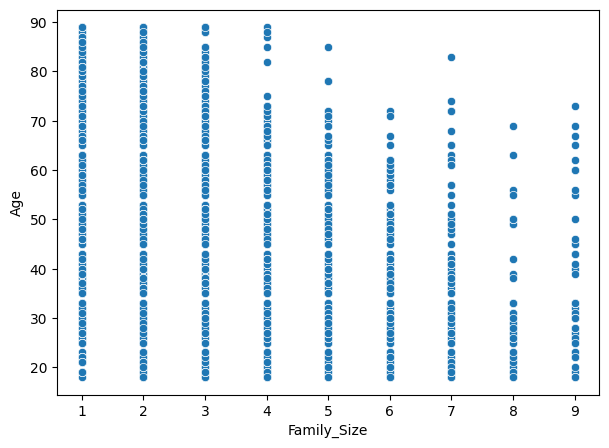

In [20]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Family_Size',y='Age',data=df_cleaned)

In [21]:
X=df_cleaned[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']].values
y=df_cleaned[['Segmentation']].values

In [22]:
one_hot_enc = OneHotEncoder()

In [23]:
one_hot_enc.fit(y)

OneHotEncoder()

In [24]:
y.shape

(8819, 1)

In [25]:
y = one_hot_enc.transform(y).toarray()

In [26]:
y.shape

(8819, 4)

In [27]:
X.shape

(8819, 8)

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=50)

In [29]:
X_train[0]

array([ 0.,  1., 85.,  0.,  7.,  0.,  2.,  1.])

In [30]:
X_train.shape

(5908, 8)

In [31]:
scaler_age = MinMaxScaler()

In [32]:
scaler_age.fit(X_train[:,2].reshape(-1,1))

MinMaxScaler()

In [33]:
X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)

In [34]:
X_train_scaled[:,2] = scaler_age.transform(X_train[:,2].reshape(-1,1)).reshape(-1)
X_test_scaled[:,2] = scaler_age.transform(X_test[:,2].reshape(-1,1)).reshape(-1)

In [35]:
early_stop = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

model = Sequential([
    Dense(6, activation='relu', input_shape=[8]),
    Dropout(0.3),
    Dense(10, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='relu'),
    Dense(4, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.compile(optimizer='adam',loss='categorical_crossentropy' ,metrics=['accuracy'])

In [37]:
model.fit(x=X_train_scaled,y=y_train,
             epochs= 2000,
             batch_size= 32,
             validation_data=(X_test_scaled,y_test),
             callbacks=[early_stop]
             )

Epoch 1/2000
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2370 - loss: 1.6360 - val_accuracy: 0.2831 - val_loss: 1.3849
Epoch 2/2000
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2836 - loss: 1.4018 - val_accuracy: 0.3133 - val_loss: 1.3703
Epoch 3/2000
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2977 - loss: 1.3748 - val_accuracy: 0.3260 - val_loss: 1.3633
Epoch 4/2000
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2833 - loss: 1.3744 - val_accuracy: 0.3473 - val_loss: 1.3584
Epoch 5/2000
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3074 - loss: 1.3640 - val_accuracy: 0.3422 - val_loss: 1.3487
Epoch 6/2000
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3266 - loss: 1.3530 - val_accuracy: 0.3607 - val_loss: 1.3389
Epoch 7/2000
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3286 - loss: 1.3488 - val_accuracy: 0.3672 - val_loss: 1.3279
Epoch 8/2000
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3487 - loss: 1.3223 - 

In [38]:
metrics = pd.DataFrame(model.history.history)

In [39]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.251016,1.526802,0.283064,1.384918
1,0.284191,1.397911,0.313294,1.370288
2,0.288761,1.378025,0.326005,1.363325
3,0.286730,1.374401,0.347303,1.358415
4,0.313304,1.361329,0.342150,1.348732


<Axes: >

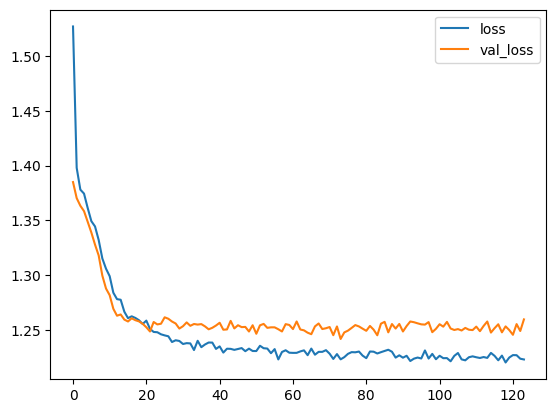

In [40]:
metrics[['loss','val_loss']].plot()

In [41]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [42]:
x_test_predictions.shape

(2911,)

In [43]:
y_test_truevalue = np.argmax(y_test,axis=1)

In [44]:
y_test_truevalue.shape

(2911,)

In [45]:
print(confusion_matrix(y_test_truevalue,x_test_predictions))

[[401  72 152 132]
 [238 116 250  82]
 [146  85 378  77]
 [233  36  76 437]]


In [46]:
print(classification_report(y_test_truevalue,x_test_predictions))

              precision    recall  f1-score   support

           0       0.39      0.53      0.45       757
           1       0.38      0.17      0.23       686
           2       0.44      0.55      0.49       686
           3       0.60      0.56      0.58       782

    accuracy                           0.46      2911
   macro avg       0.45      0.45      0.44      2911
weighted avg       0.46      0.46      0.44      2911



In [47]:
model.save('customer_classification_model.h5')

In [48]:
with open('customer_data.pickle', 'wb') as fh:
   pickle.dump([X_train_scaled,y_train,X_test_scaled,y_test,df_cleaned,df_cleaned,scaler_age,ordinal_encoder,one_hot_enc,le], fh)


In [49]:
model = load_model('customer_classification_model.h5')

In [50]:
with open('customer_data.pickle', 'rb') as fh:
   [X_train_scaled,y_train,X_test_scaled,y_test,df_cleaned,df_cleaned,scaler_age,ordinal_encoder,one_hot_enc,le]=pickle.load(fh)


In [60]:
x_single_prediction = np.argmax(model.predict(X_test_scaled[1:2,:]), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [61]:
print(x_single_prediction)


[2]


In [62]:
print(le.inverse_transform(x_single_prediction))


['C']
